<a href="https://colab.research.google.com/github/blckpwdr50/datasciencecoursera/blob/master/TRAIN_HS_PD_Lab_18_%5BDaniel_Schaben%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lab 18: AI Ethics**
---

### **Description**:
In this lab, we will analyze UCI's Adult Data set and explore ethical issues with the dataset and models created from it, as well as attempt to mitigate any bias we find. Then, we will explore Amazon's Clarify.


### **Lab Structure**
* **Part 1**: [Using Visualizations to Identify Bias](#p1)

* **Part 2**: [Using AWS Clarify to Identify Bias](#p2)

* **Part 3**: [Mitigating Bias](#p3)


</br>


### **Goals:**
By the end of this lab, you will be able to:
* Explain why imbalanced data can lead to bias in models.
* You will be able to identify bias through different means like data exploration and using AWS Clarify.
* Mitigate bias in data once you have found it using several different approaches.


<br>

### **Cheat Sheets**
[AWS Clarify Cheatsheet](https://docs.google.com/document/d/1GbjF8EXenn_7ZigHBLAdKfBZFhGu7LmBnMaR6161NgI/edit?usp=sharing)

<br>

**Before starting, run the code below to import all necessary functions and libraries.**


In [3]:
#!pip install scikit-learn
!pip install --quiet smclarify

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from smclarify.bias.report import *

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.7/135.7 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.0/11.0 MB 31.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.8/79.8 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.9/72.9 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.8/72.8 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.7/72.7 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.1/160.1 kB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.0/154.0 kB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 145.4/145.4 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

<a name="p1"></a>

---
## **Part 1: Using Visualizations to Identify Bias**
---

We will be exploring UCI's [Adult Data Set](https://archive-beta.ics.uci.edu/ml/datasets/adult) and the bias inherent within it. This data was intended to inspect incomes over $50K based on census data in 1994, but as we will discover, there are some pitfalls with this data set. The following table will provide a description of what each column in the data set represents.

<br>

**NOTE:** This data set was derived from 'Census Data'. For this project, we are assuming this refers to the US Census Data for the year 1994. Our comparisons for visualizations reflect this assumption.

<br>

**Run the cell below to load the data.**

In [4]:
url = "https://raw.githubusercontent.com/batuhansahincanel/UCIsAdultDataset/main/adult.data" #"https://raw.githubusercontent.com/batuhansahincanel/UCIsAdultDataset/main/adult.data"
names=["Age", "Workclass", "Final-Weight", "Education", "Education-number-of-years", "Marital-status",
        "Occupation", "Relationship", "Race", "Sex", "Capital-gain", "Capital-loss",
        "Hours-per-week", "Native-country", "Target"]

adult = pd.read_csv(url, names = names)
adult = adult.dropna()
adult.head()

,Age,Workclass,Final-Weight,Education,Education-number-of-years,Marital-status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-per-week,Native-country,Target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### **Problem #1.1: Sex Distribution**

Complete the code below to create a bar graph for the sex distribution in this dataset. What do you notice in the visualization?

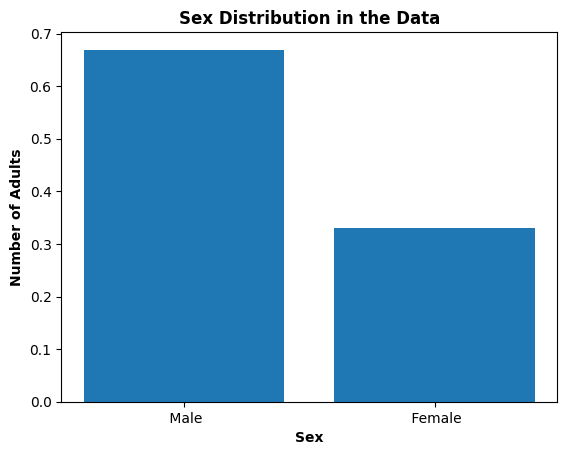

In [7]:
sex_labels = adult["Sex"].unique()
sex_counts = adult["Sex"].value_counts(normalize=True)

plt.bar(sex_labels,sex_counts)

plt.title('Sex Distribution in the Data', fontweight = 'bold')
plt.xlabel('Sex', fontweight = 'bold')
plt.ylabel('Number of Adults', fontweight = 'bold')

plt.show()

#### **Follow Up**

You may have noticed that there is approximately double the amount of males than females in our data. This is a big red flag. If the data were truly representative of the US population in 1994, there would actually be 50.9% females compared to the 49.1% of males.

### **Problem #1.2: Race Distribution**

Complete the code below to create a bar graph for the race distribution in this dataset. What do you notice in the visualization?

<br>

Consider using the following when creating your graph to make the x-ticks more readable: `plt.xticks(rotation = 45)`.

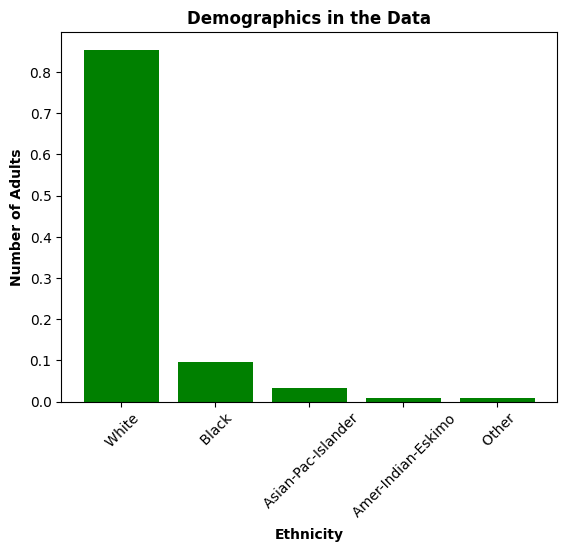

In [9]:
race_labels = adult["Race"].unique()
race_counts = adult["Race"].value_counts(normalize = True)

plt.bar(race_labels, race_counts, color = 'green')

plt.title('Demographics in the Data', fontweight = 'bold')
plt.xlabel('Ethnicity', fontweight = 'bold')
plt.ylabel('Number of Adults', fontweight = 'bold')
plt.xticks(rotation = 45)

plt.show()

#### **NOTE**

This part of the data is also off! In the 1990s, approximately 80% of the population was white; 12% black; 1% American Indian, Eskimo, and Aleut; 3% Asian Pacific Islander; and the final 4% falling under the 'other' category. Our visual shows approximately 85% white, 10% black, and the remainder other minorities. While this ratio is not off by as large of amount as it was for the sex distribution, this data is still misrepresenting the US population.

### **Problem #1.3: Education Distribution**

Create a bar graph for the education distribution in this dataset. What do you notice in the visualization?

[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64
Index([' HS-grad', ' Some-college', ' Bachelors', ' Masters', ' Assoc-voc',
       ' 11th', ' Assoc-acdm', ' 10th', ' 7th-8th', ' Prof-school', ' 9th',
       ' 12th', ' Doctorate', ' 5th-6th', ' 1st-4th', ' Preschool'],
      dtype='object')


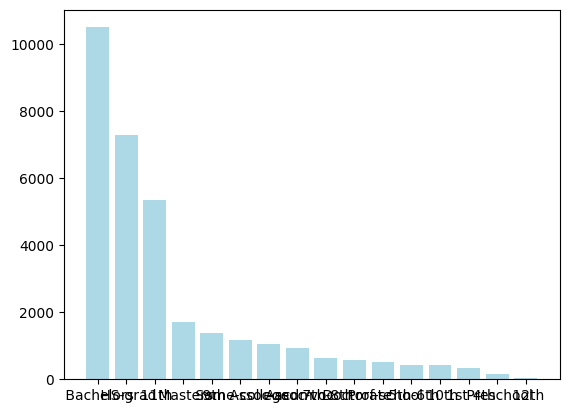

In [8]:
education_labels = adult["Education"].unique()
education_counts = adult["Education"].value_counts()

plt.bar(education_labels, education_counts, color = 'lightblue')

#plt.title('Education Levels in the Data', fontweight = 'bold')
#plt.xlabel('Education Level', fontweight = 'bold')
#plt.ylabel('Number of Adults', fontweight = 'bold')
#plt.xticks(rotation = 90)

#plt.show()

print(education_labels)
print(education_counts)
print(education_counts.index)

#### **NOTE**

The number of highschool graduates is more than 33% compared to college graduates and almost 50% more compared to individuals with bachelor's degrees.

### **Problem #1.4: Education Distribution Revised**

Modify your solution from above so that the counts for:
* `1st-4th` and `5th-6th` are grouped under a new label: `Elementary`.
* `9th`, `10th`, `11th`, `12th` are grouped under a new label: `High School`.

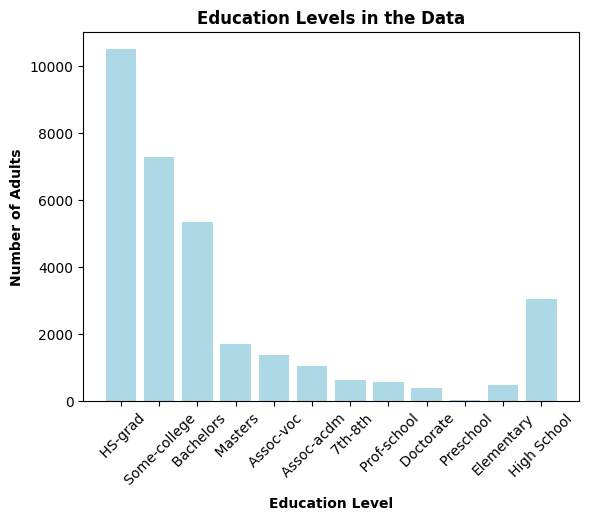

In [10]:
education_dict = adult["Education"].value_counts().to_dict()

# Group all elementary
education_dict["Elementary"] = 0
for value in [' 1st-4th', ' 5th-6th']:
    education_dict["Elementary"] += education_dict.pop(value)

# Group all High School
education_dict["High School"] = 0
for value in [' 9th', ' 10th', ' 11th', ' 12th']:
    education_dict["High School"] += education_dict.pop(value)

education_labels = education_dict.keys()
education_counts = education_dict.values()


plt.bar(education_labels, education_counts, color = 'lightblue')

plt.title('Education Levels in the Data', fontweight = 'bold')
plt.xlabel('Education Level', fontweight = 'bold')
plt.ylabel('Number of Adults', fontweight = 'bold')
plt.xticks(rotation = 45)

plt.show()

### **Problem #1.5: Income Distribution**


Create a bar graph for the target (income above or below 50K). What do you notice?

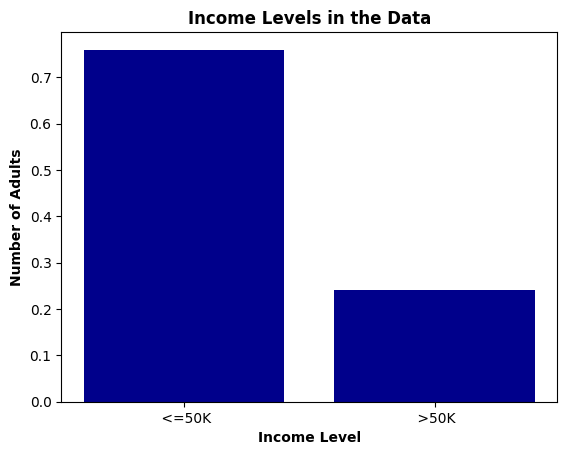

In [11]:
target_labels = adult["Target"].unique()
target_counts = adult["Target"].value_counts(normalize=True)

plt.bar(target_labels, target_counts, color = 'darkblue')

plt.title('Income Levels in the Data', fontweight = 'bold')
plt.xlabel('Income Level', fontweight = 'bold')
plt.ylabel('Number of Adults', fontweight = 'bold')

plt.show()

#### **NOTE**

While we do not have as much information about the exact values of earnings for the year 1994, we must remember that this is our target data. It would be ideal to have equal amounts of both categories for our model.

### **Problem #1.6: Target by Sex**

Create a new feature, `Target by Sex`, that designates any person with:
* `Target` of `' <=50K'` and `Sex` of `' Male'` as `'Male <=50K'`.
* `Target` of `' <=50K'` and `Sex` of `' Female'` as `'Female <=50K'`.
* `Target` of `' >50K'` and `Sex` of `' Male'` as `'Male >50K'`.
* `Target` of `' >50K'` and `Sex` of `' Female'` as `'Female >50K'`.


Then create a bar plot of this feature.

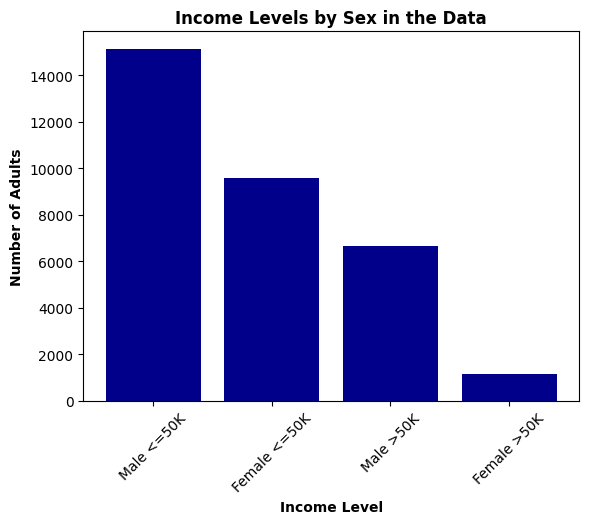

In [12]:
adult.loc[(adult['Target'] == ' <=50K') & (adult['Sex'] == ' Male'), 'Target by Sex'] = 'Male <=50K'
adult.loc[(adult['Target'] == ' <=50K') & (adult['Sex'] == ' Female'), 'Target by Sex'] = 'Female <=50K'
adult.loc[(adult['Target'] == ' >50K') & (adult['Sex'] == ' Male'), 'Target by Sex'] = 'Male >50K'
adult.loc[(adult['Target'] == ' >50K') & (adult['Sex'] == ' Female'), 'Target by Sex'] = 'Female >50K'

target_by_sex_labels = adult["Target by Sex"].unique()
target_by_sex_counts = adult["Target by Sex"].value_counts()

plt.bar(target_by_sex_labels, target_by_sex_counts, color = 'darkblue')

plt.title('Income Levels by Sex in the Data', fontweight = 'bold')
plt.xlabel('Income Level', fontweight = 'bold')
plt.ylabel('Number of Adults', fontweight = 'bold')
plt.xticks(rotation = 45)

plt.show()

#### **NOTE**

This visual is extremely important. If we were to use sex in our model, we could easily be overfitting to the female population since our dataset for that section is much smaller than the rest of the data. Furthermore, there is not even 2,000 data points for females earning over 50K (less than 6% of our data).

<a name="p2"></a>

---
## **Part 2: Using AWS Clarify to Identify Bias**
---

In this section, we are going to use Clarify to identify bias. This method is *much faster* than creating bar graphs for every column.

Here is an AWS Clarify [cheatsheet](https://docs.google.com/document/d/1vvwmoWuGlfko7FpwnkjOF844TDLvHYTfG9EG5E7v0L0/edit?usp=sharing) for interpretting results.



### **Problem #2.1: AWS Clarify & UCI's Adult Dataset**


#### **Steps #1-2: Load the data and import packages.**


This step has been completed in the first code cell.

#### **Step #3: Denote the facet column, the label column, and the group variable.**


Set the:
* Facet column as `Sex`.
* Label column with `Target` as the target column and `' >50K'` as the positive label.
* `Sex` as the group variable.

In [13]:
facet_column = FacetColumn('Sex')
label_column = LabelColumn('Target', adult['Target'], [' >50K'])
group_variable = adult['Sex']

#### **Step #4: Generate bias report.**

Check out the [cheat sheet](https://docs.google.com/document/d/1GbjF8EXenn_7ZigHBLAdKfBZFhGu7LmBnMaR6161NgI/edit?usp=sharing) to see how to interpret pre-training metrics. Using this page, interpret what the following report is saying.

<br>

**Run the cell below to generate your bias report.**

In [14]:
report = bias_report(adult, facet_column, label_column, stage_type=StageType.PRE_TRAINING, group_variable=group_variable)

# use this to print your report - call it "report" for the code to work
for cl in report:
    print("\n\n","-"*35)
    print("-"*15, cl["value_or_threshold"], "-"*15)
    for metric in cl['metrics']:
        print(f"{metric['description']}: {metric['value']}")



 -----------------------------------
---------------  Male ---------------
Conditional Demographic Disparity in Labels (CDDL): 0.0
Class Imbalance (CI): -0.33841098246368356
Difference in Positive Proportions in Labels (DPL): -0.19627598779361352
Jensen-Shannon Divergence (JS): 0.030241092804852217
Kullback-Liebler Divergence (KL): 0.10928938730742264
Kolmogorov-Smirnov Distance (KS): 0.19627598779361355
L-p Norm (LP): 0.27757616390590434
Total Variation Distance (TVD): 0.19627598779361355


 -----------------------------------
---------------  Female ---------------
Conditional Demographic Disparity in Labels (CDDL): 0.0
Class Imbalance (CI): 0.33841098246368356
Difference in Positive Proportions in Labels (DPL): 0.19627598779361352
Jensen-Shannon Divergence (JS): 0.030241092804852217
Kullback-Liebler Divergence (KL): 0.14118531053076427
Kolmogorov-Smirnov Distance (KS): 0.19627598779361355
L-p Norm (LP): 0.27757616390590434
Total Variation Distance (TVD): 0.19627598779361355


#### **Step #5: Look at the imbalance.**

Use the cheat sheet to interpret what the bias report is telling you.

In [ ]:
# CDD - no demographic disparity
#CI - has more training samples
#DPL - higher proportion of positive outcomes
#JS - similarly distributed labels
#KL - diverge (but not by a lot)
#KS - relative imbalance
#LP - diverge
#TVD - not very similarly distributed


In [ ]:
# CDD - no demographic disparity
#CI - has fewer training samples
#DPL - lower proportion of positive outcomes
#JS - similarly distributed labels
#KL - diverge (but not by a lot)
#KS - relative imbalance
#LP - diverge
#TVD - not very similarly distributed

### **Problem #2.2: AWS Clarify & UCI's Parkinson's Dataset**

This dataset is composed of a range of biomedical voice measurements from 42 people with early-stage Parkinson's disease recruited to a six-month trial of a telemonitoring device for remote symptom progression monitoring. The recordings were automatically captured in the patient's homes.

Columns in the table contain subject number, subject age, subject gender, time interval from baseline recruitment date, motor UPDRS, total UPDRS, and 16 biomedical voice measures. Each row corresponds to one of 5,875 voice recording from these individuals. The main aim of the data is to predict the motor and total UPDRS scores ('motor_UPDRS' and 'total_UPDRS') from the 16 voice measures.


#### **Steps #1-2: Load the data and import packages.**


In [15]:
url = "https://raw.githubusercontent.com/the-codingschool/TRAIN-datasets/main/parkinsons/parkinsons.csv"
df = pd.read_csv(url)
df.head()

,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,1,72,0,5.6431,28.199,34.398,0.00662,0.000034,0.00401,0.00317,...,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,1,72,0,12.6660,28.447,34.894,0.00300,0.000017,0.00132,0.00150,...,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,1,72,0,19.6810,28.695,35.389,0.00481,0.000025,0.00205,0.00208,...,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,1,72,0,25.6470,28.905,35.810,0.00528,0.000027,0.00191,0.00264,...,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,1,72,0,33.6420,29.187,36.375,0.00335,0.000020,0.00093,0.00130,...,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361


#### **Step #3: Denote the facet column, the label column, and the group variable.**

Set the:
* Facet column as `age`.
* Label column with `sex` as the target column and `'0'` as the positive label.
* `age` as the group variable.

In [16]:
facet_column = FacetColumn('age')
label_column = LabelColumn('Target', df['sex'], [0])
group_variable = df['age']

#### **Step #4: Generate bias report.**


Use the cheat sheet to interpret pre-training metrics. Using this page, interpret what the following report is saying.

<br>

**Run the cell below to generate your bias report.**

In [17]:
report = bias_report(df, facet_column, label_column, stage_type=StageType.PRE_TRAINING, group_variable=group_variable)

# use this to print your report - call it "report" for the code to work
for cl in report:
    print("\n\n","-"*35)
    print("-"*15, cl["value_or_threshold"], "-"*15)
    for metric in cl['metrics']:
        print(f"{metric['description']}: {metric['value']}")



 -----------------------------------
--------------- 72 ---------------
Conditional Demographic Disparity in Labels (CDDL): -0.05276595744680851
Class Imbalance (CI): 0.894468085106383
Difference in Positive Proportions in Labels (DPL): -0.3354896675651393
Jensen-Shannon Divergence (JS): 0.017021228446644887
Kullback-Liebler Divergence (KL): -0.27158859691248927
Kolmogorov-Smirnov Distance (KS): 0.3354896675651393
L-p Norm (LP): 0.3354896675651393
Total Variation Distance (TVD): 0.16774483378256966


 -----------------------------------
--------------- 58 ---------------
Conditional Demographic Disparity in Labels (CDDL): 0.0
Class Imbalance (CI): 0.8539574468085106
Difference in Positive Proportions in Labels (DPL): -0.0008316447905136748
Jensen-Shannon Divergence (JS): 3.990149039778668e-07
Kullback-Liebler Divergence (KL): 1.5964327743804357e-06
Kolmogorov-Smirnov Distance (KS): 0.0008316447905137303
L-p Norm (LP): 0.0011761233418214096
Total Variation Distance (TVD): 0.0008316447

#### **Step #5: Look at the imbalance.**

Use the cheat sheet provided to interpret what the bias report is telling you.

<a name="p3"></a>

---
## **Part 3: Mitigating Bias**
---

In this section, we will implement a KNN model before and after using different techniques for mitigating bias.

### **Problem #3.1**

We need to convert any non-numerical binary values into numerical ones that can be used by our model. Specifically convert,
* `Sex` from `' Female'` and `' Male'` to 0 and 1 respectively.

<br>

**NOTE**: There are several ways you could do this that you have learned, including label encoding.

In [18]:
sex_map = {' Female': 0, ' Male': 1}

adult['Sex'] = adult['Sex'].map(sex_map)

adult.head()

,Age,Workclass,Final-Weight,Education,Education-number-of-years,Marital-status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-per-week,Native-country,Target,Target by Sex
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,1,2174,0,40,United-States,<=50K,Male <=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,1,0,0,13,United-States,<=50K,Male <=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,1,0,0,40,United-States,<=50K,Male <=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,1,0,0,40,United-States,<=50K,Male <=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,0,0,0,40,Cuba,<=50K,Female <=50K


### **Problem #3.2**

Determine the features and target and split the data into training and test sets.

In [26]:
# Decide the independent and dependent variables
features = adult.drop(columns = ['Target', 'Target by Sex'],axis=1)
label = adult['Target']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state=42)

### **Problem #3.3**

Lets prepare the data for modeling. Specifically,
* Dummy variable encode the following non-numerical categorical variables:
> * `Workclass`
> * `Education`
> * `Marital-status`
> * `Occupation`
> * `Relationship`
> * `Race`
> * `Native-country`

* Standardize the data.



<br>

**NOTE**: It may be helpful to refer back to the [Advanced ML Techniques Cheat Sheet](https://docs.google.com/document/d/16BeAevvvvCYJ5q0qLTl0SQnTPWnGkktwGYUxvnJMkE4/edit?usp=drive_link).


In [27]:
# Dummy Variable encode your data
cols = ['Workclass', 'Education', 'Marital-status', 'Occupation', 'Relationship', 'Race', 'Native-country']

X_train_dv = X_train.drop(columns = cols)
X_test_dv = X_test.drop(columns = cols)

dv_enc = OneHotEncoder(sparse_output = False, drop = 'first')
dv_enc.set_output(transform = 'pandas')

dv_enc.fit(X_train[cols])
dv_columns = dv_enc.get_feature_names_out()

X_train_dv[dv_columns] = dv_enc.transform(X_train[cols])

X_test_dv[dv_columns] = dv_enc.transform(X_test[cols])



# Scale your data
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train_dv)
X_test_scaled = scaler.transform(X_test_dv)

### **Problem #3.4**

Initialize and evaluate a 5NN model using 10-Folds CV. The [Advanced ML Techniques Cheat Sheet](https://docs.google.com/document/d/16BeAevvvvCYJ5q0qLTl0SQnTPWnGkktwGYUxvnJMkE4/edit?usp=drive_link) will be helpful here as well.

In [28]:
knn = KNeighborsClassifier(n_neighbors=5)

scores = cross_val_score(knn,X_train_dv,y_train,cv=10)
print("10-Folds CV Scores: " + str(scores.mean()) + " +/- " + str(scores.std()))

10-Folds CV Scores: 0.7729966005348334 +/- 0.005789259007402012


### **Problem #3.5**

Evaluate your model using the smaller training and validation set created below. Specifically,
* Print the accuracy score.
* Plot the confusion matrix.

<br>

**NOTE**: Since we are using `type1` as the label directly here, we just use `display_labels=clf.classes_`. This is one good reason for using non-encoded labels.

Accuracy: 0.7904030710172745


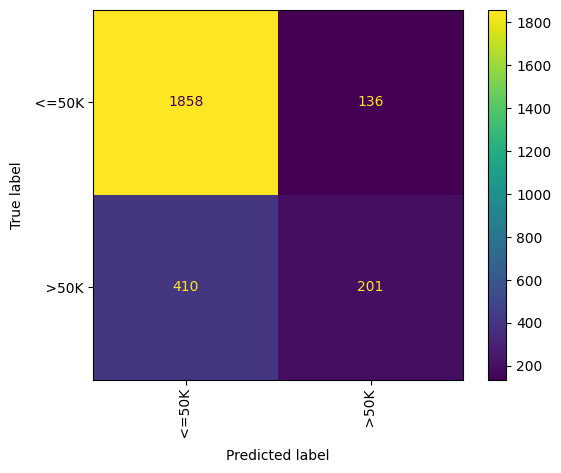

In [29]:
# Create validation and smaller training set
X_train_small, X_val, y_train_small, y_val = train_test_split(X_train_dv, y_train, test_size=0.1, random_state=42)

# Fit the model on the samller training set
knn.fit(X_train_small, y_train_small)

# Print the accuracy score based on the validation set
pred = knn.predict(X_val)

accuracy = accuracy_score(y_val, pred)
print(f'Accuracy: {accuracy}')

# Plot the confusion matrix based on the validation set
cm = confusion_matrix(y_val, pred, labels=knn.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot()

plt.xticks(rotation = 90)
plt.show()

### **Problem #3.6**

Let's attempt to mitigate the bias by blinding our model. In other words, we will simply *remove* sex as an input for our model. The hope is that by blinding our model to a feature we have explicitly shown to be biased in the previous Parts, we can remove this bias.

<br>

**NOTE**: Although it is often one of the first thoughts, blinding to bias is not always good practice! There are patterns in the data correlated to the removed features that mean we have not really removed the bias. In fact, this can be even more problematic since we believe we have mitigated the bias and take the results more seriously, when in fact the results still reflect biases.

10-Folds CV Scores: 0.7729966005348334 +/- 0.005789259007402012
Accuracy: 0.7904030710172745


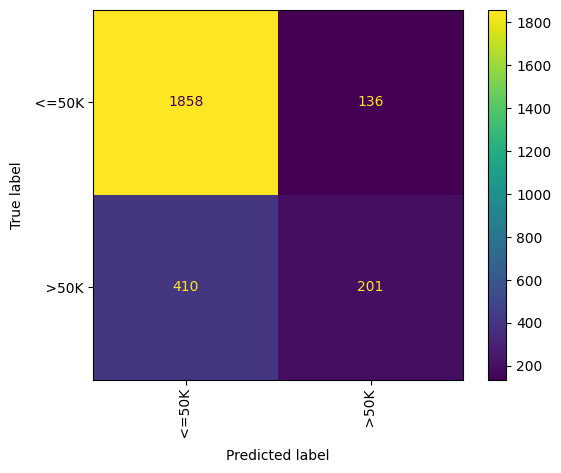

In [30]:
# Create a new dataset without the the Sex feature
X_train_blind = X_train_dv.drop(columns = 'Sex')


# Initialize and evaluate using 10-Folds CV
knn = KNeighborsClassifier(n_neighbors = 5)
scores = cross_val_score(knn, X_train_blind, y_train, cv=10)
print("10-Folds CV Scores: " + str(scores.mean()) + " +/- " + str(scores.std()))


# Evaluate your model

# Create validation and smaller training set
X_train_small, X_val, y_train_small, y_val = train_test_split(X_train_blind, y_train, test_size=0.1, random_state=42)

# Fit the model on the samller training set
knn.fit(X_train_small, y_train_small)

# Print the accuracy score based on the validation set
pred = knn.predict(X_val)

accuracy = accuracy_score(y_val, pred)
print(f'Accuracy: {accuracy}')

# Plot the confusion matrix based on the validation set
cm = confusion_matrix(y_val, pred, labels=knn.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot()

plt.xticks(rotation = 90)
plt.show()

### **Problem #3.7**

Let's now try mitigating bias by balancing the dataset. This involves making the data distribution more equal. In this step, we will balance the sex distribtuion by ensuring there are equal amount of data points for male and female entries being used in our model.

<br>

**Run the cell below to create this balanced dataset.**

In [31]:
# get two data frames by sex
females = X_train_dv.query("Sex == 0")
males = X_train_dv.query("Sex == 1")

# make the males the minimum between females and males
sampled_males = males.sample(n=int(min(females.shape[0], males.shape[0])))

# combine
X_train_balanced = pd.concat([sampled_males, females]).sample(frac=1)
y_train_balanced = y_train[X_train_balanced.index]

10-Folds CV Scores: 0.8037015615962986 +/- 0.006273104390031809
Accuracy: 0.7958357432041643


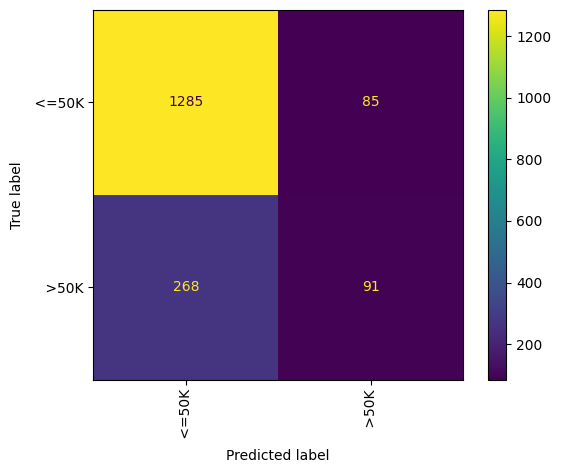

In [32]:
# Initialize and evaluate using 10-Folds CV
knn = KNeighborsClassifier(n_neighbors = 5)
scores = cross_val_score(knn, X_train_balanced, y_train_balanced, cv=10)
print("10-Folds CV Scores: " + str(scores.mean()) + " +/- " + str(scores.std()))


# Evaluate your model

# Create validation and smaller training set
X_train_small, X_val, y_train_small, y_val = train_test_split(X_train_balanced, y_train_balanced, test_size=0.1, random_state=42)

# Fit the model on the samller training set
knn.fit(X_train_small, y_train_small)

# Print the accuracy score based on the validation set
pred = knn.predict(X_val)

accuracy = accuracy_score(y_val, pred)
print(f'Accuracy: {accuracy}')

# Plot the confusion matrix based on the validation set
cm = confusion_matrix(y_val, pred, labels=knn.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot()

plt.xticks(rotation = 90)
plt.show()

#### **NOTE**

This should have been your most accurate model and it has made an honest attempt to mitigate (instead of blinding ourselves to) bias.

# End of Lab

---
© 2023 The Coding School, All rights reserved